# Name : **Bhavin Bhatt**
# Intelligent Policing
## Empowering Police forces through Data Analytics.

<center><a><img src="https://www.ecpi.edu/sites/default/files/CJ_1.png"/></a></center>

## **1) Objective of the proposed research**
The mission of our startup  company '**NightWatch**' is modernize the policing through use of cutting edge technologies. Our vision is to empower various law enforcement agencies across our nation  with actionable insights by analysing crime data from year 1975 to 2015 across various states. Our motto is 'Safer places leads to happy communities which inturn leads to economic prosperity'.

We will analyse various crime data statistics such as violent crimes, homicides, rapes, assaults, robberies, etc for various years from 1975 to 2015 and compare it with the population statistics of each state to comeup with which states rank top and bottom in different crime types across state police jurisdictions.

The aim here is to provide advanced solutions to various law enforcement agencies to look at trends and crime patterns for effective use of policing resources for maximum effectiveness. With the help of analyses we aim to reduce the crime rates by revisiting important policing resource deployments and policies for effective usage.

## **2) Data Exploration**

In [1]:
#Importing the dataset
import pandas as pd
import numpy as np
df = pd.read_csv("/content/report.csv")
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [2]:
#Getting the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 2829
Number of columns: 15


Our dataset consists of 2829 rows and 15 columns which explains a comprehensive amount of data for analysis.

In [3]:
#Getting column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me


*   The column report_year covers the crime from year 1975 to 2015.
*   Column agency_jurisdiction explains various states across USA where the
    crimes have been reported.
*   The columns 'population', 'crimes_percapita' explains the relation of   
    total crimes occuring in terms of population.
*   The columns 'violent_crimes', 'homicides', 'rapes', 'assaults',  
    'robberies', 'homicides_percapita', 'rapes_percapita', 'assaults_percapita', 'robberies_percapita' explains various types of crimes occuring across geography.

In [4]:
#Checking NULL values
df.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [5]:
df.isnull().sum().sum()

837

* The summary above shows the number of null values in each column.

* If we drop the null values row and column then we would be removing total 837 rows which would mean eliminating 30% of our data. Thus we would not get accurate results.

* We will try to replace null values in each column with mode values grouped by states so that we can get a comprehensive view of our dataset.

Note: Code snippet below done with the help of Chatgpt

In [6]:
import pandas as pd

# Assuming you have a DataFrame named df
# df = ...

# Get a list of column names with NaN values
columns_list = df.columns[df.isna().any()].tolist()

# Iterate through the columns with NaN values
# Calculate the mode for the current column within each 'agency_jurisdiction' group
for col in columns_list:
    mode_values = df.groupby('agency_jurisdiction')[col].apply(lambda x: x.mode())

    # Check if mode_values is not empty before filling NaN values
    if not mode_values.empty:
        df[col].fillna(mode_values.iloc[0], inplace=True) # Using the mode values to fill Null values in the current column

# Print the modified DataFrame
#print(df)


In [7]:
df.isnull().sum()

report_year            0
agency_code            0
agency_jurisdiction    0
population             0
violent_crimes         0
homicides              0
rapes                  0
assaults               0
robberies              0
months_reported        0
crimes_percapita       0
homicides_percapita    0
rapes_percapita        0
assaults_percapita     0
robberies_percapita    0
dtype: int64

As can be seen from above we have succesfully removed the null values from our dataset and now we can do Exploratory data analysis.

In [8]:
unique_agency_jurisdictions = df['agency_jurisdiction'].unique()
print(unique_agency_jurisdictions)

['Albuquerque, NM' 'Arlington, TX' 'Atlanta, GA' 'Aurora, CO' 'Austin, TX'
 'Baltimore County, MD' 'Baltimore, MD' 'Boston, MA' 'Buffalo, NY'
 'Charlotte, NC' 'Chicago, IL' 'Cincinnati, OH' 'Cleveland, OH'
 'Columbus, OH' 'Dallas, TX' 'Denver, CO' 'Detroit, MI' 'El Paso, TX'
 'Fairfax County, VA' 'Fort Worth, TX' 'Fresno, CA' 'Honolulu, HI'
 'Houston, TX' 'Indianapolis, IN' 'Jacksonville, FL' 'Kansas City, MO'
 'Las Vegas, NV' 'Long Beach, CA' 'Los Angeles County, CA'
 'Los Angeles, CA' 'Louisville, KY' 'Memphis, TN' 'Mesa, AZ'
 'Miami-Dade County, FL' 'Miami, FL' 'Milwaukee, WI' 'Minneapolis, MN'
 'Montgomery County, MD' 'Nashville, TN' 'Nassau County, NY'
 'New Orleans, LA' 'New York City, NY' 'Newark, NJ' 'Oakland, CA'
 'Oklahoma City, OK' 'Omaha, NE' 'Orlando, FL' 'Philadelphia, PA'
 'Phoenix, AZ' 'Pittsburgh, PA' 'Portland, OR'
 "Prince George's County, MD" 'Raleigh, NC' 'Sacramento, CA'
 'Salt Lake City, UT' 'San Antonio, TX' 'San Diego, CA'
 'San Francisco, CA' 'San Jose, CA' 'S

It can be seen from above that one of the state is named as a country United states which isn't a correct value. Thus we will remove United states row as it does not give us the correct view of the dataset.

In [9]:
df = df[df['agency_jurisdiction'] != 'United States']
print(df['agency_jurisdiction'].unique())

['Albuquerque, NM' 'Arlington, TX' 'Atlanta, GA' 'Aurora, CO' 'Austin, TX'
 'Baltimore County, MD' 'Baltimore, MD' 'Boston, MA' 'Buffalo, NY'
 'Charlotte, NC' 'Chicago, IL' 'Cincinnati, OH' 'Cleveland, OH'
 'Columbus, OH' 'Dallas, TX' 'Denver, CO' 'Detroit, MI' 'El Paso, TX'
 'Fairfax County, VA' 'Fort Worth, TX' 'Fresno, CA' 'Honolulu, HI'
 'Houston, TX' 'Indianapolis, IN' 'Jacksonville, FL' 'Kansas City, MO'
 'Las Vegas, NV' 'Long Beach, CA' 'Los Angeles County, CA'
 'Los Angeles, CA' 'Louisville, KY' 'Memphis, TN' 'Mesa, AZ'
 'Miami-Dade County, FL' 'Miami, FL' 'Milwaukee, WI' 'Minneapolis, MN'
 'Montgomery County, MD' 'Nashville, TN' 'Nassau County, NY'
 'New Orleans, LA' 'New York City, NY' 'Newark, NJ' 'Oakland, CA'
 'Oklahoma City, OK' 'Omaha, NE' 'Orlando, FL' 'Philadelphia, PA'
 'Phoenix, AZ' 'Pittsburgh, PA' 'Portland, OR'
 "Prince George's County, MD" 'Raleigh, NC' 'Sacramento, CA'
 'Salt Lake City, UT' 'San Antonio, TX' 'San Diego, CA'
 'San Francisco, CA' 'San Jose, CA' 'S

We have succesfully removed the United states row and now we can proceed further with our data analysis.

## **3) One column selection**

In [10]:
#Subsetting dataframe
df_onecolumn = df[['report_year','population','agency_jurisdiction','violent_crimes','homicides','rapes','assaults','robberies']]

# Getting total number of crimes for year 2015
df_onecolumn = df_onecolumn[df_onecolumn['report_year'] == 2015]

df_onecolumn['total_crimes'] = df_onecolumn.groupby('agency_jurisdiction')['violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies'].transform('sum').sum(axis=1)

#Finally to get the data frame with states and total crimes for the year 2015
df_onecolumn = df_onecolumn[['agency_jurisdiction','population','total_crimes']]
#print(df_onecolumn)

#Creating a new column to get the total crime per population
df_onecolumn['crime_percentage_population'] = df_onecolumn['total_crimes'] / df_onecolumn['population']*100

#Sorting crime rate in terms of percentage of population
df_onecolumn = df_onecolumn.sort_values(by='crime_percentage_population', ascending=False)

print(df_onecolumn.head(10))


     agency_jurisdiction  population  total_crimes  \
2820       St. Louis, MO    317095.0       11524.0   
2776         Detroit, MI    673225.0       23692.0   
2791         Memphis, TN    657936.0       22898.0   
2795       Milwaukee, WI    600400.0       19166.0   
2766       Baltimore, MD    621252.0       19084.0   
2803         Oakland, CA    419481.0       12102.0   
2785     Kansas City, MO    473373.0       13418.0   
2783    Indianapolis, IN    863675.0       22248.0   
2826      Washington, DC    672228.0       16168.0   
2762         Atlanta, GA    464710.0       10406.0   

      crime_percentage_population  
2820                     3.634242  
2776                     3.519180  
2791                     3.480278  
2795                     3.192205  
2766                     3.071861  
2803                     2.884994  
2785                     2.834551  
2783                     2.575969  
2826                     2.405136  
2762                     2.239246  


<ipython-input-10-acb53f1a6a62>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_onecolumn['total_crimes'] = df_onecolumn.groupby('agency_jurisdiction')['violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies'].transform('sum').sum(axis=1)


In [11]:
df_onecolumn = df_onecolumn.sort_values(by='total_crimes', ascending=False)
df_onecolumn.head(10)

,agency_jurisdiction,population,total_crimes,crime_percentage_population
2801,"New York City, NY",8550861.0,100176.0,1.171531
2789,"Los Angeles, CA",3962726.0,50312.0,1.269631
2770,"Chicago, IL",2728695.0,49326.0,1.807677
2782,"Houston, TX",2275221.0,43988.0,1.933351
2807,"Philadelphia, PA",1567810.0,32264.0,2.057902
2786,"Las Vegas, NV",1562134.0,28766.0,1.841455
2776,"Detroit, MI",673225.0,23692.0,3.519180
2791,"Memphis, TN",657936.0,22898.0,3.480278
2783,"Indianapolis, IN",863675.0,22248.0,2.575969
2795,"Milwaukee, WI",600400.0,19166.0,3.192205


* The df_onecolumn dataframe when sorted by crimes_percentage_population gives total crimes in terms of percentage of population and gives top 10 states with highest crimes in terms of percentage of population.

* The maximum number of crimes in terms of percentage of population occured in St. Lois, MO which is about 3.63% that is highest amongst all the states followed by Detroit, MI with 3.52% in 2nd and Memphis, TN with 3.48% as third amongst the category.

* The df_one_column when sorted by total_crimes gives top 10 states with highest number of crimes.
*It can also be observed that New York City ranks highest in total crimes
which is around 1lac with second highest being in Los Angeles, CA which has around 50k crimes recorded for year 2015.
* It can also be seen that the crimes in New York City, NY are double that of second highest crime state Los Angeles, CA which is a huge gap.

* The difference in total crimes amongst 3rd, 4th , 5th highest states is not more than 10k. Thus we need to further investigate why the crime rate in New York City is double that of Los Angeles which is 2nd highest in crime.  

## **4) Sort**

In [12]:
df_5 = df[['agency_jurisdiction','violent_crimes','homicides','rapes','assaults','robberies']]
#print(df_5)

In [13]:
df_total_crime = df_5.groupby('agency_jurisdiction')['violent_crimes','homicides','rapes','assaults','robberies'].sum().reset_index()
violent_crimes_highest = df_total_crime.sort_values(by='violent_crimes', ascending=False).head(3)
homicides_highest = df_total_crime.sort_values(by='homicides', ascending=False).head(3)
rapes_highest = df_total_crime.sort_values(by='rapes', ascending=False).head(3)
assaults_highest = df_total_crime.sort_values(by='assaults', ascending=False).head(3)
robberies_highest = df_total_crime.sort_values(by='robberies', ascending=False).head(3)

<ipython-input-13-1bfb8eff63c4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_total_crime = df_5.groupby('agency_jurisdiction')['violent_crimes','homicides','rapes','assaults','robberies'].sum().reset_index()


In [14]:
print(violent_crimes_highest)
print(homicides_highest)
print(rapes_highest)
print(assaults_highest)
print(robberies_highest)

   agency_jurisdiction  violent_crimes  homicides     rapes   assaults  \
41   New York City, NY       4263284.0    47176.0  101795.0  1788065.0   
29     Los Angeles, CA       1979166.0    25999.0   69748.0  1027731.0   
10         Chicago, IL       1960886.0    27727.0   90209.0   951805.0   

    robberies  
41  2326248.0  
29   855688.0  
10   891145.0  
   agency_jurisdiction  violent_crimes  homicides     rapes   assaults  \
41   New York City, NY       4263284.0    47176.0  101795.0  1788065.0   
10         Chicago, IL       1960886.0    27727.0   90209.0   951805.0   
29     Los Angeles, CA       1979166.0    25999.0   69748.0  1027731.0   

    robberies  
41  2326248.0  
10   891145.0  
29   855688.0  
   agency_jurisdiction  violent_crimes  homicides     rapes   assaults  \
41   New York City, NY       4263284.0    47176.0  101795.0  1788065.0   
10         Chicago, IL       1960886.0    27727.0   90209.0   951805.0   
29     Los Angeles, CA       1979166.0    25999.0   6974

The dataframe df_total_crime gives us the total number of crimes from 1975 to 2015 for every state in maintly 5 crime categories which are as below
1. Violent crimes - This column describes the crimes which are grave and heinious in nature. The top three state in this category are New York with 42,63,284 followed by Los Angeles 19,79,166 and Chicago which has 19,60,866 instances till date.

2. homicides - These crimes show the crimes which include violence by firearams.The top three states in this category being New York with 47,716 instances followed by Los Angeles with 27,727 instances and Chicago with 25,999 instances.

3. rapes - These are crimes against women and top three states being NewYork, Los Angeles and chicago. It is observed that the crimes of rapes are higher than homicides in these top 3 states.

4. assaults - These are attacks of physical nature with the intent to kill or harm a person. The top three states being the same in all categories. The crimes in assaults category are higher than homicides and rapes in these states.

5. robberies - It is action of taking of property from a person by force or threat of force. The top 3 states are the New York, Los Angeles and Chicago. It is also oberved that Robberies rank 3nd in crime category greater than homicides and rapes but less than assaults as well as violent _crimes.

In [23]:
print(df_percapita)

      report_year agency_jurisdiction  crimes_percapita  homicides_percapita  \
2760         2015     Albuquerque, NM            965.84                 7.68   
2761         2015       Arlington, TX            502.11                 2.06   
2762         2015         Atlanta, GA           1119.62                20.23   
2763         2015          Aurora, CO            460.81                 6.66   
2764         2015          Austin, TX            372.53                 2.45   
...           ...                 ...               ...                  ...   
2823         2015          Tucson, AZ            655.50                 5.85   
2824         2015           Tulsa, OK            903.57                13.70   
2825         2015  Virginia Beach, VA            138.25                 4.20   
2826         2015      Washington, DC           1202.57                24.10   
2827         2015         Wichita, KS            984.80                 6.93   

      rapes_percapita  assaults_percapi

In [50]:
# Top states in crime_per_capita for the year 2015
df_percapita = df[['report_year','agency_jurisdiction','crimes_percapita','homicides_percapita','rapes_percapita','assaults_percapita','robberies_percapita']]
df_percapita = df_percapita[df_percapita['report_year'] == 2015]

df_percapita_crimes = df_percapita.sort_values(by='crimes_percapita', ascending=False)[['report_year','agency_jurisdiction','crimes_percapita']]
print(df_percapita_crimes.head(10))

#Top states in homicides per capita
df_percapita_homicides = df_percapita.sort_values(by='homicides_percapita', ascending=False)[['report_year','agency_jurisdiction','homicides_percapita']]
print(df_percapita_homicides.head(10))

#Top states in rapes per capita
df_percapita_rapes = df_percapita.sort_values(by='rapes_percapita', ascending=False)[['report_year','agency_jurisdiction','rapes_percapita']]
print(df_percapita_rapes.head(10))

#Top states in assaults per capita
df_percapita_assaults = df_percapita.sort_values(by='assaults_percapita', ascending=False)[['report_year','agency_jurisdiction','assaults_percapita']]
print(df_percapita_assaults.head(10))

#Top states in robberies per capita
df_percapita_robberies = df_percapita.sort_values(by='robberies_percapita', ascending=False)[['report_year','agency_jurisdiction','robberies_percapita']]
print(df_percapita_robberies.head(10))

      report_year agency_jurisdiction  crimes_percapita
2820         2015       St. Louis, MO           1817.12
2776         2015         Detroit, MI           1759.59
2791         2015         Memphis, TN           1740.14
2795         2015       Milwaukee, WI           1596.10
2766         2015       Baltimore, MD           1535.93
2803         2015         Oakland, CA           1442.50
2785         2015     Kansas City, MO           1417.28
2783         2015    Indianapolis, IN           1287.98
2826         2015      Washington, DC           1202.57
2762         2015         Atlanta, GA           1119.62
      report_year agency_jurisdiction  homicides_percapita
2820         2015       St. Louis, MO                59.29
2766         2015       Baltimore, MD                55.37
2776         2015         Detroit, MI                43.82
2800         2015     New Orleans, LA                41.68
2802         2015          Newark, NJ                38.34
2795         2015       Milwau

6. crimes_percapita - From the above data frame results it can be seen that the top 3 states in crimes per capita for year 2015 are St. Louis(MO) with 1817 crimes per thousand followed by  Detroit(MI) 1759crimes and Memphis(TN) 1740 crimes. The difference between top 3 states is not much and all of them can be considered highest in crimes_percapita

7. homicides_percapita - From the results above for the year 2015, top 3 states in homicides per capita are St. Louis(MO) with 59.29 crimes, Baltimore(MD) with 55.37 crimes and Detroit, MI with 43.82 crimes.

8. rapes_percapita - The results above indicate top 10 states in rape crimes per thousand for the year 2015. Salt Lake City, UT with 151.57 crimes per thousand followed by New Orleans,LA with 103.95 and Minneapolis, MN at 98.43 crimes are top 3 states. The difference between Salt Lake City, UT and New Orleans is around 30% which is very high compared to other states in the sequence.

9. assaults_percapita - The results above indicate top 3 states in assault crimes per thousand. Memphis, TN is leading at 116.3 crimes per thousand followed by Detroit,MI at 1123.55 crimes and St. Louis, MO at 1110.39 crimes oer thousand.

10. robberies_percapita - The results indicate top 10 states in robbery crimes per thousand. Oakland, CA is at top with 784.30 crimes per thousand followed by Baltimore, MD at 694.24 crimes per thousand and Neward, NJ with 642.40 crimes at 3rd position.

## **5) Series**

In [16]:
df_series = df[['report_year','violent_crimes','homicides','rapes','assaults','robberies']]
df_series.groupby('report_year').sum().reset_index().head(10)

,report_year,violent_crimes,homicides,rapes,assaults,robberies
0,1975,506390.0,9195.0,24576.0,180444.0,292089.0
1,1976,481084.0,8375.0,24147.0,180178.0,268298.0
2,1977,474971.0,8458.0,26575.0,187928.0,251924.0
3,1978,492731.0,8700.0,28367.0,198924.0,256654.0
4,1979,545730.0,9934.0,31713.0,217283.0,286714.0
5,1980,614701.0,10726.0,33221.0,230290.0,340378.0
6,1981,626415.0,10335.0,32261.0,225008.0,358725.0
7,1982,610706.0,9636.0,30900.0,230296.0,339788.0
8,1983,594799.0,9112.0,32019.0,233658.0,319924.0
9,1984,615910.0,8633.0,33898.0,263583.0,309710.0


The dataframe above describes the 6 columns:
* report_year - It describes the reporting year of the crimes from 1975 to 2015
* violent_crimes - The violent crimes column describes the crimes which are violent and heinious in nature. The violent crimes had been rising from 1975 to
 1992 with the highest rate of violent crime in the year 1992.
* homicides - Homicides mean killing of one person by another. The column describes the homicide crime rate for years 1975 to 2015. It was also observed that homicide crime rates were rising at a greater rate than violent crimes with highest being in the year 1992.
* rapes - These crimes have always been highest from year 1985 to 1992 peaking during these years and more or less remaining at same levels. It was also obersved that unlike other crimes which have been gradually rising, rapes have always been high and remained same during 1985 to 1992 and then showing a gradual reduction from 1992 to 2015 but still higher compared to other crimes.
* assaults - These are the crimes committed with intent to kill or harm a person. The Assault crimes had been highest from 1989 till 1994 and then gradually decreasing but still higher than pre 1989 levels.
* robberies - It is action of taking of property from a person by force or threat of force. The robberies have been higher compared to other crimes between 4000 - 6000 with crimes peaking in the year 1991.


## **6) Plots** **bold text**

<ipython-input-17-9a5485824dfc>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x= df_series["report_year"],y= df_series["violent_crimes"],palette="viridis",ci=None)


Text(0, 0.5, 'Number of Violent crimes')

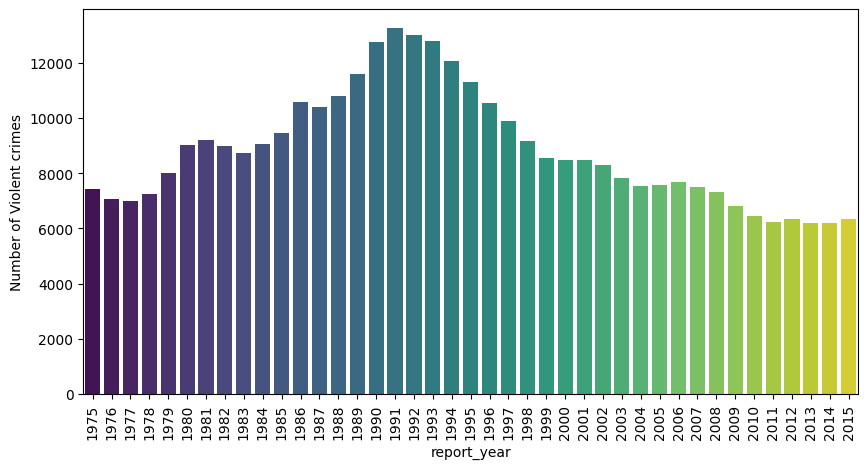

In [17]:
# Violent crimes
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x= df_series["report_year"],y= df_series["violent_crimes"],palette="viridis",ci=None)
plt.ylabel("Number of Violent crimes")

 **Violent crimes**- This column describes the most henious crimes occured . It was found that the violent crimes in United states had been gradually rising from the 1975 with crimes peaking from year 1990 to 19995  and then gradually decreasing with lowest violent crime rate in 2011 and then slightly rising till 2015.

<ipython-input-18-f83e825ea294>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x= df_series["report_year"],y= df_series["homicides"],palette="magma",ci=None)


Text(0, 0.5, 'Number of Homicide crimes')

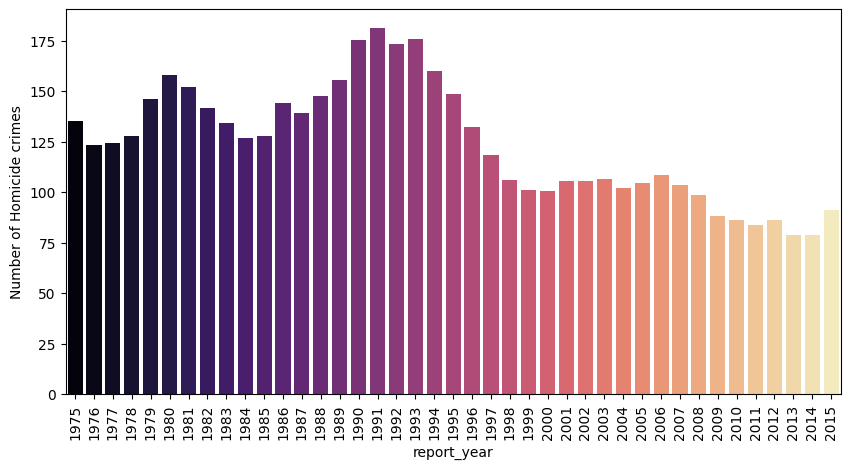

In [18]:
# Homicides crimes
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x= df_series["report_year"],y= df_series["homicides"],palette="magma",ci=None)
plt.ylabel("Number of Homicide crimes")

**Homicide crime** - Homicide crime rates were high in the year 1975and then slightly reduced in 1976 with more or less remaining same in years 1977 to 1979. It peaked in the year 1980 and then gradually reduced from 1980 to 1984 with levels being similar to 19977. The homicide crime rate then increased from 1986 to 1992 and remaining almost same until year 1994. After 1994 there was a much reduction in the crime rate until 1999. The crime rate levels remained more or less constant from 2000 to 2008. After 2008 there was a slight reduction in homicide crime rate which then rose in year 2015 to 2008 crime levels.

<ipython-input-19-776e89262618>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x= df_series["report_year"],y= df_series["rapes"],palette="plasma",ci=None)


Text(0, 0.5, 'Number of Rape crimes')

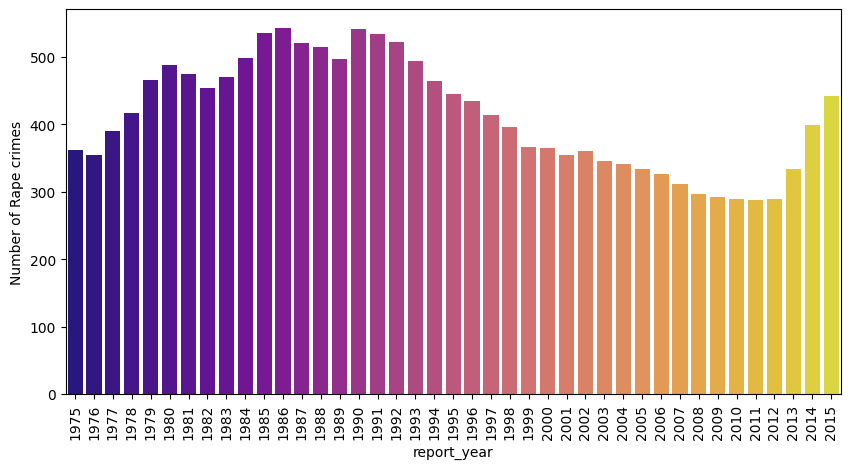

In [19]:
# Rapes crimes
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x= df_series["report_year"],y= df_series["rapes"],palette="plasma",ci=None)
plt.ylabel("Number of Rape crimes")

**Rape crimes** - The rape crimes have always been on the higher from 1975 to 1992 compared to other crimes which were gradually rising. The crime levels peaked in the 1979 and remained consistent until 1981 with a slight reduction in year 1982 and then rising again another peak in year 1985 crossing the 500k mark. The rape crimes have remained constant from 1985 to 1992 with slight decrease or increase during these times showing a failure of the law protection agencies in curbing this menace. From the year 1993 the crime had been gradually reducing until 1999 and then remaining constant from 2000 to 2006. There was a slight decrease from 2007 to 2012 with crime reaming at a constant level of around 300k . From 2013 there was a rise in rape crime with higher level in 2015 acheiving similar crime rate to the year 1995.

<ipython-input-20-762c2a5214a1>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x= df_series["report_year"],y= df_series["assaults"],palette="inferno",ci=None)


Text(0, 0.5, 'Number of Assault crimes')

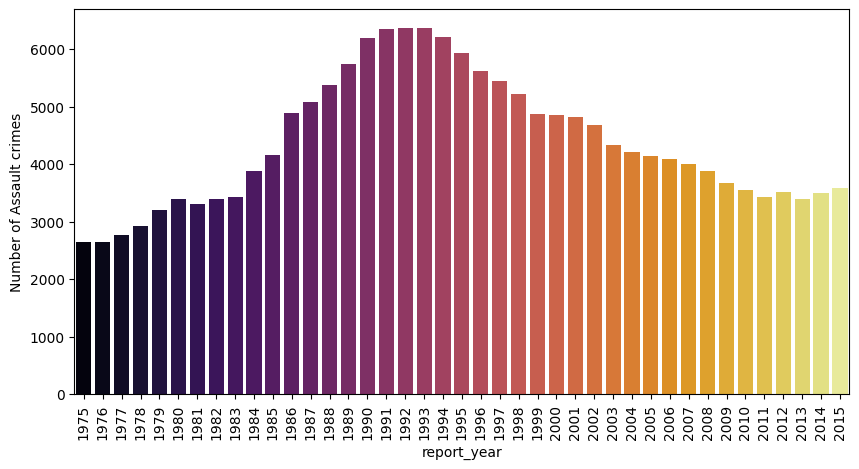

In [20]:
# Assaults crimes
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x= df_series["report_year"],y= df_series["assaults"],palette="inferno",ci=None)
plt.ylabel("Number of Assault crimes")

**Assault crimes** - The Assault crimes have been almost steady  from 1975 to 1983. Then there was a considerbale rise in assault from 1985 to 1994 with peak values remaining consistent from 1991 to 1993. There was a gradual reduction in crimes from 1994 to 1997 and then remaining steady from 1998 till 2001 and then gradually reducing in 2002. From 2002 to 2015 there was a low dip in crime rate with assault crimes risiing again in 2012 until 2015. The 2015 crime rate levels are higher than pre 1984 levels which means that the policing policies and processes in curbing this crime haven't been that successful.

<ipython-input-21-f4af4c33c1a3>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x= df_series["report_year"],y= df_series["robberies"],palette="husl",ci=None)


Text(0, 0.5, 'Number of Robberies crimes')

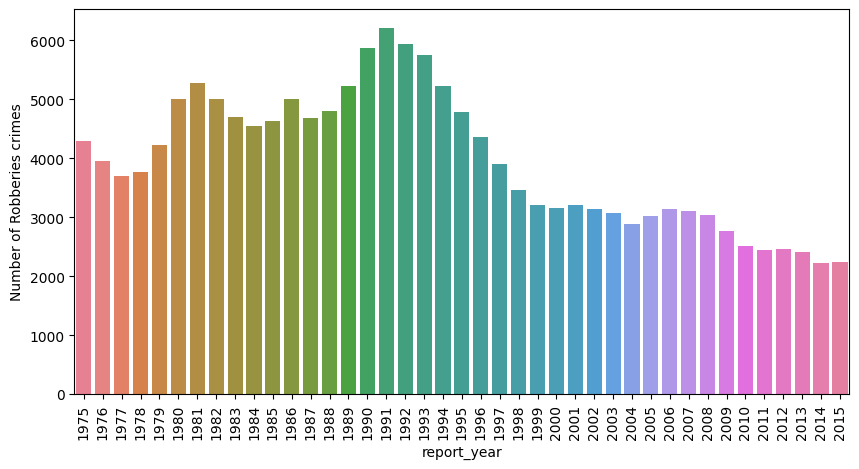

In [21]:
# Robberies crimes
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x= df_series["report_year"],y= df_series["robberies"],palette="husl",ci=None)
plt.ylabel("Number of Robberies crimes")

**Robberies** - The crime rate had been higher in 1975 and then reduced for 3 years from 1976 til 1979. The crime rate again increased from 1980 and remained in between 4700 to 5300 until 1989 . Between 1990 to 1993 these crimes were highest reported with peak values touching above 6000 levels in 1991. The crime rate considerably reduced from 1994 till 1988 and have been steady from 1999 till 2008. From 2008 to 2015 the robberies crimes have been reducing meaning that the law enforcement agencies were successfull in curbing the crime with 2015 level being the lowest in history of this crime.

[Text(0.5, 0, 'Total number of crimes'), Text(0, 0.5, 'City and state')]

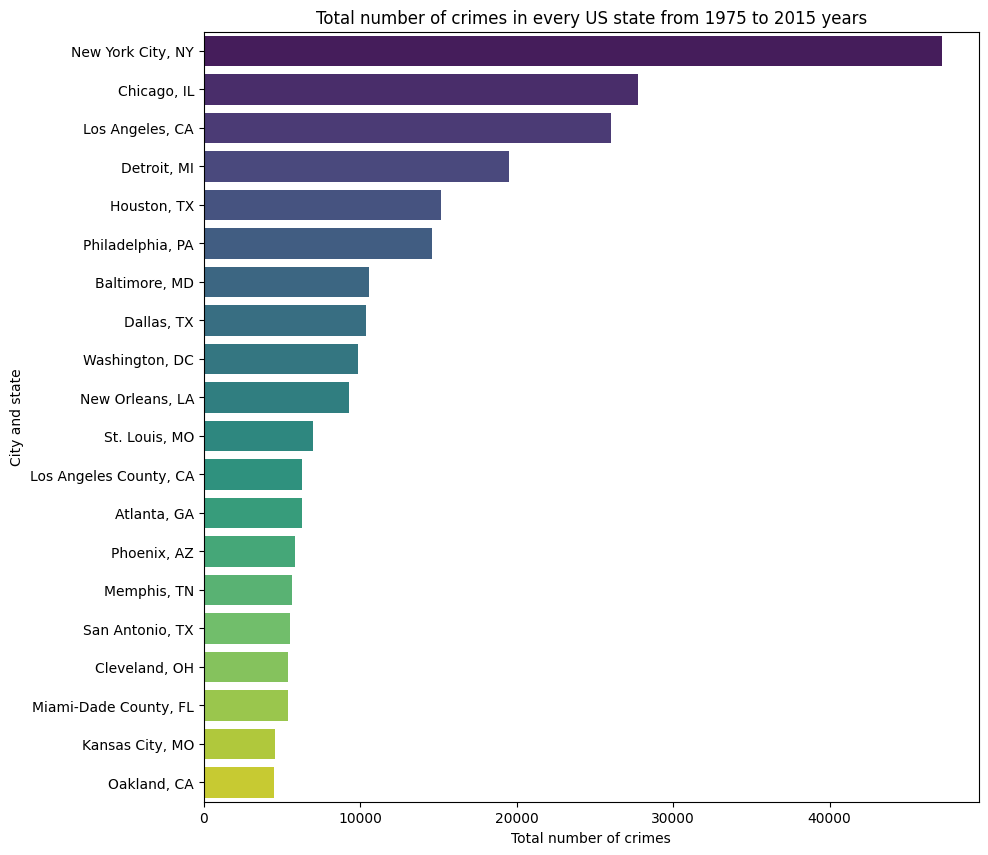

In [34]:
#Top USA states in total crimes
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,10))
df_total_crime_sorted = df_total_crime.sort_values(by='homicides', ascending=False)
df_total_crime_sorted = df_total_crime_sorted.head(20)
ax = sns.barplot(x=df_total_crime_sorted["homicides"],y=df_total_crime_sorted["agency_jurisdiction"], palette="viridis")
ax.set_title('Total number of crimes in every US state from 1975 to 2015 years')
ax.set(xlabel='Total number of crimes', ylabel='City and state')


The graph above shows the top 20 states with highest total_crimes which are sum of violent crimes, assaults, rapes, robberies, homicides from the year 1975 to 2015.
* It can be observed that New York ranks number one in total crimes followed by Chicago being 2nd and Los Angeles at 3rd.
* It was also observed that these 3 states have been consistently ranking in top 3 for all sorts of crime categories.
* The crimes in New York are nearly double that of Chicago and Los Angeles giving us a comprehensive view of the law enforecement situation in New York City.

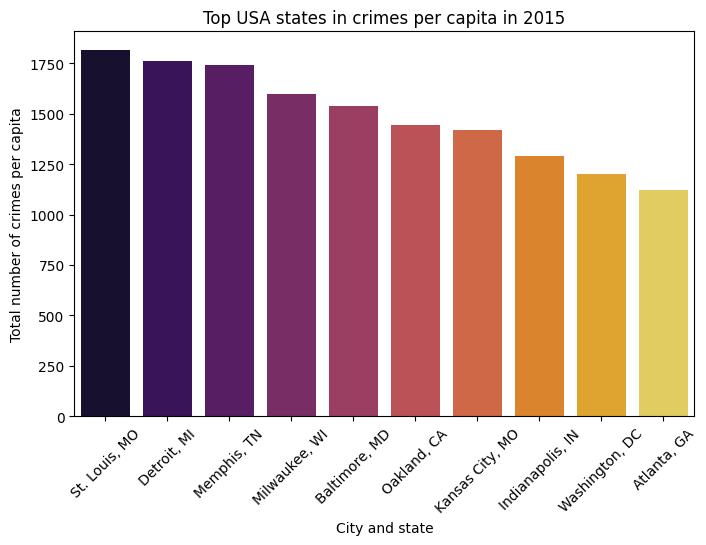

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the vertical barplot with y-axis labels
ax = sns.barplot(x=df_percapita_crimes["agency_jurisdiction"], y=df_percapita_crimes["crimes_percapita"], palette="inferno")

# Customize the plot title and axis labels
ax.set_title('Top USA states in crimes per capita in 2015')
ax.set(xlabel='City and state', ylabel='Total number of crimes per capita')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


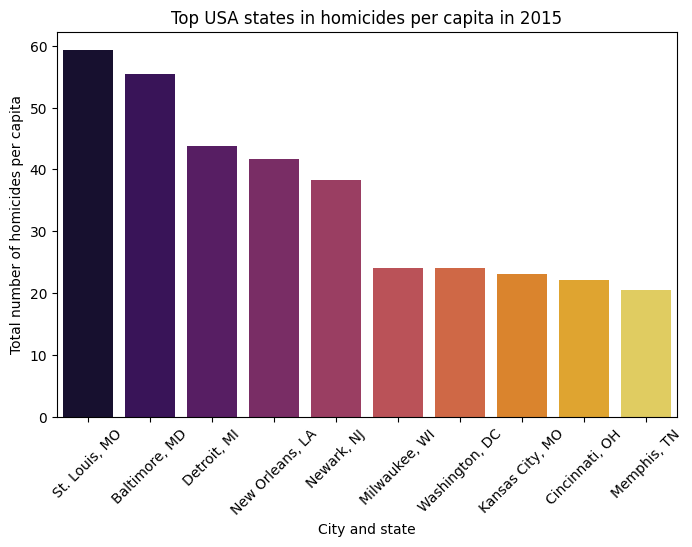

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

df_percapita_homicides = df_percapita_homicides.head(10)

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the vertical barplot with y-axis labels
ax = sns.barplot(x=df_percapita_homicides["agency_jurisdiction"], y=df_percapita_homicides["homicides_percapita"], palette="inferno")

# Customize the plot title and axis labels
ax.set_title('Top USA states in homicides per capita in 2015')
ax.set(xlabel='City and state', ylabel='Total number of homicides per capita')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



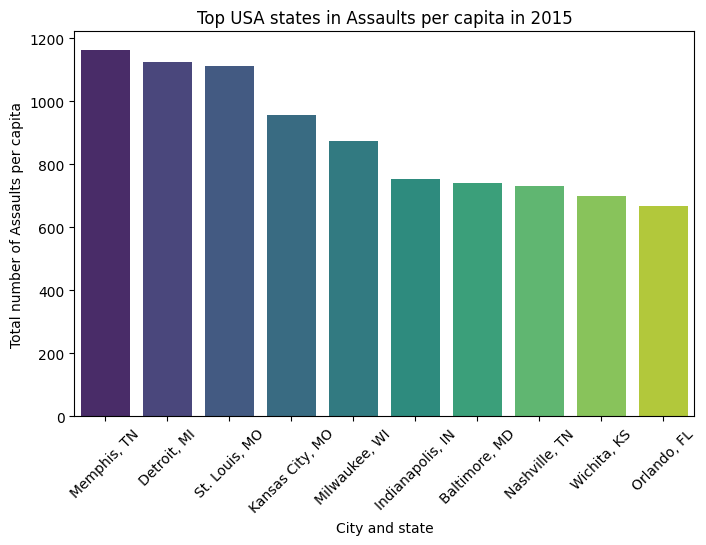

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

df_percapita_assaults = df_percapita_assaults.head(10)

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the vertical barplot with y-axis labels
ax = sns.barplot(x=df_percapita_assaults["agency_jurisdiction"], y=df_percapita_assaults["assaults_percapita"], palette="viridis")

# Customize the plot title and axis labels
ax.set_title('Top USA states in Assaults per capita in 2015')
ax.set(xlabel='City and state', ylabel='Total number of Assaults per capita')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

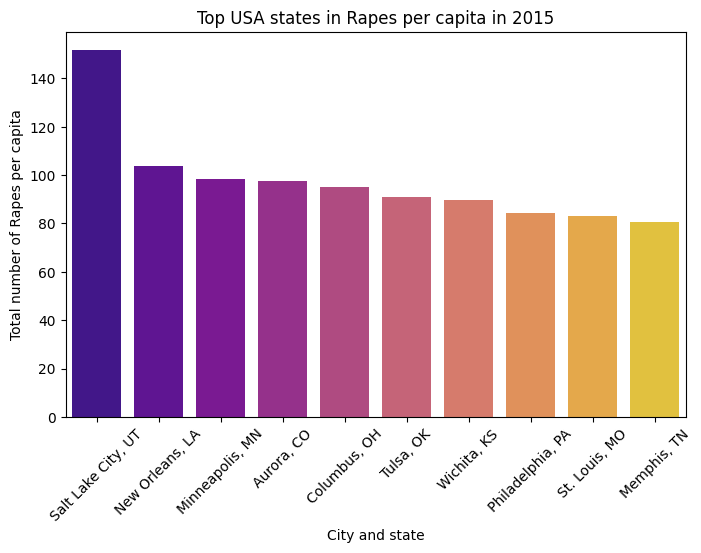

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

df_percapita_rapes = df_percapita_rapes.head(10)

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the vertical barplot with y-axis labels
ax = sns.barplot(x=df_percapita_rapes["agency_jurisdiction"], y=df_percapita_rapes["rapes_percapita"], palette="plasma")

# Customize the plot title and axis labels
ax.set_title('Top USA states in Rapes per capita in 2015')
ax.set(xlabel='City and state', ylabel='Total number of Rapes per capita')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


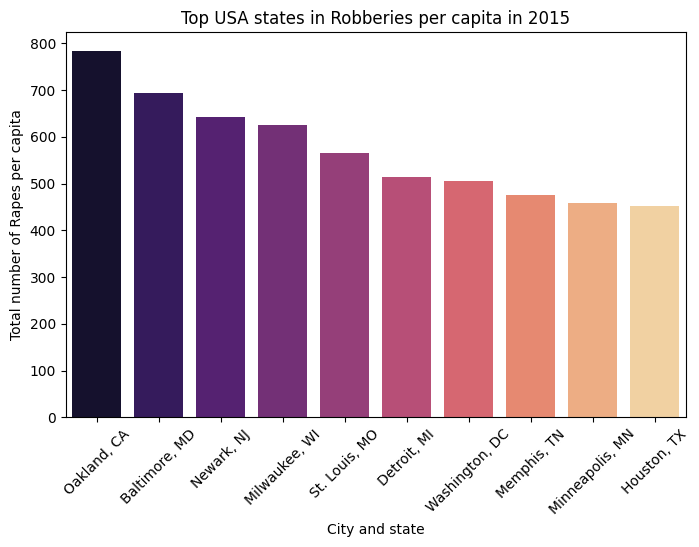

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

df_percapita_robberies = df_percapita_robberies.head(10)

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the vertical barplot with y-axis labels
ax = sns.barplot(x=df_percapita_robberies["agency_jurisdiction"], y=df_percapita_robberies["robberies_percapita"], palette="magma")

# Customize the plot title and axis labels
ax.set_title('Top USA states in Robberies per capita in 2015')
ax.set(xlabel='City and state', ylabel='Total number of Rapes per capita')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

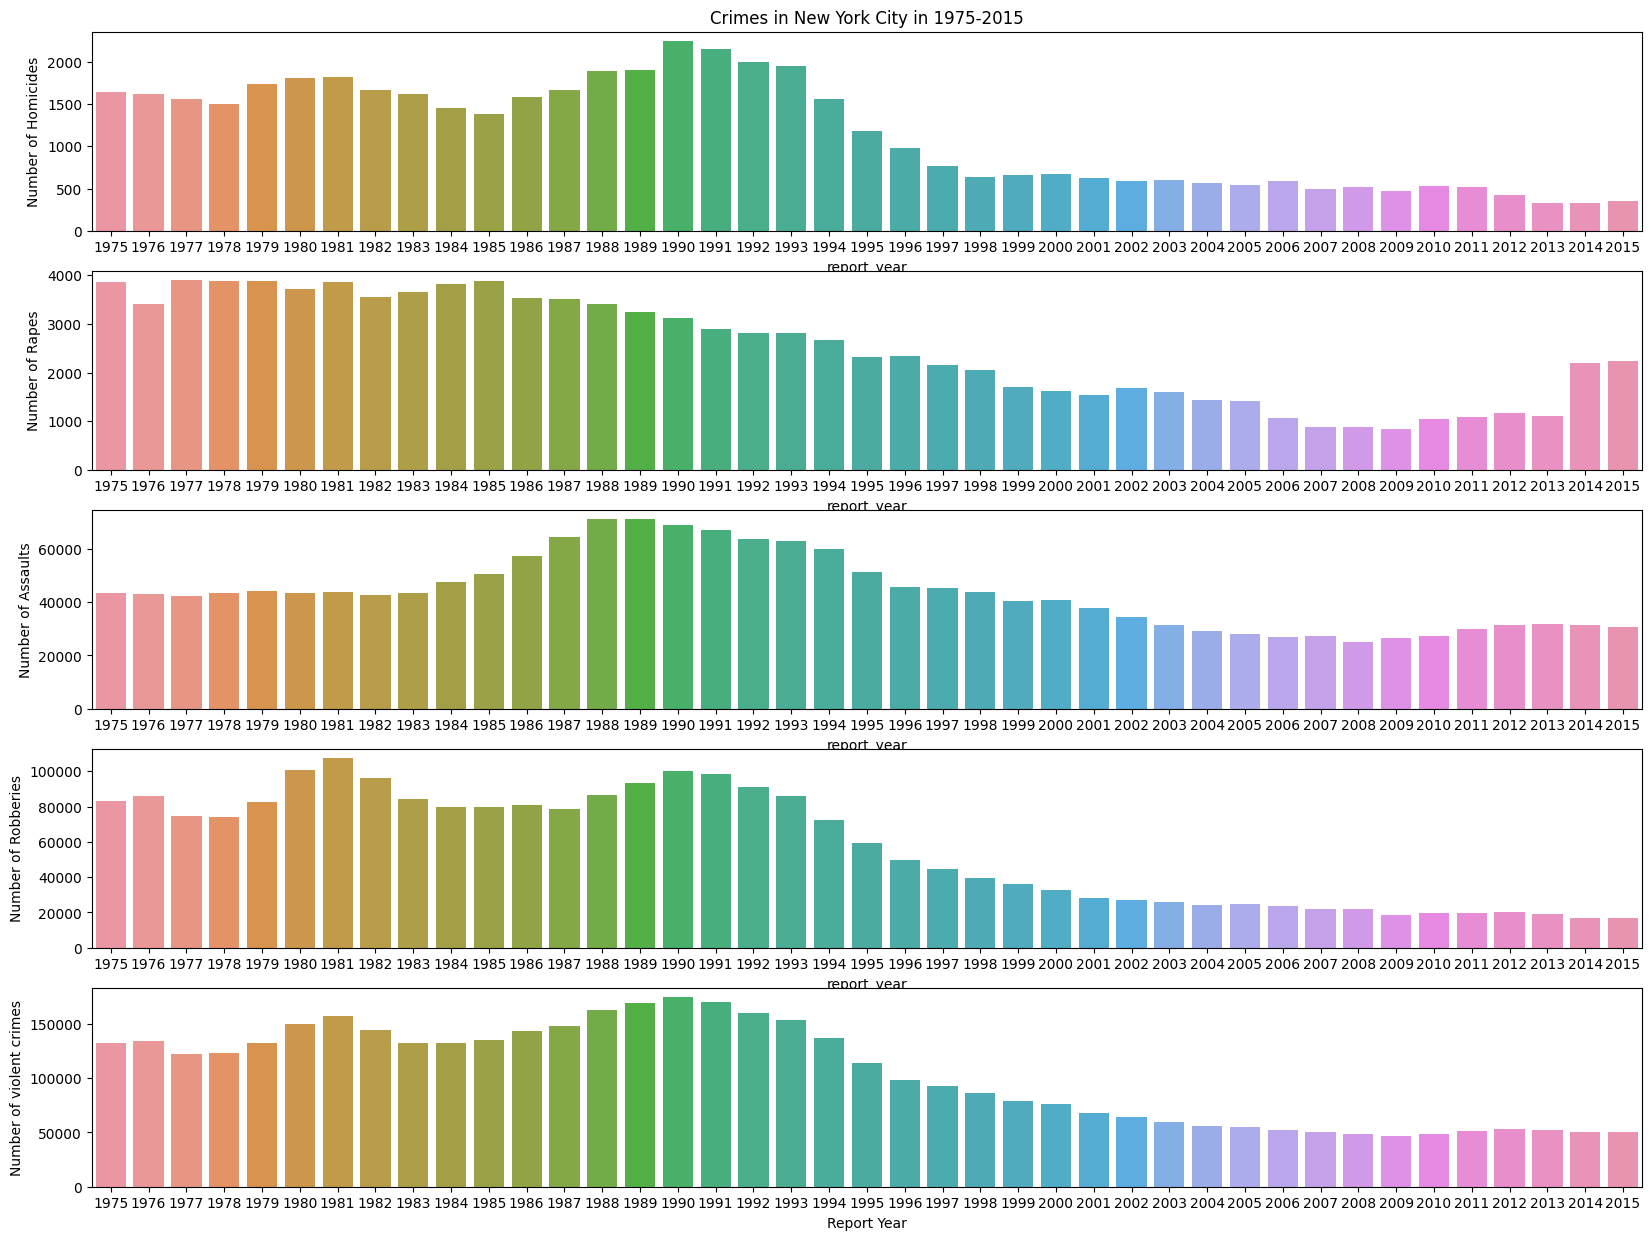

In [49]:
# Crimes in New York from 1975 to 2015
df_New_York = df[df['agency_jurisdiction'] == 'New York City, NY']

plt.figure(figsize=(20,15))

ax1 = plt.subplot(511)
sns.barplot(x = df_New_York["report_year"], y = df_New_York["homicides"])
plt.ylabel("Number of Homicides")

ax2 = plt.subplot(512, sharex=ax1)
sns.barplot(x=df_New_York["report_year"], y=df_New_York["rapes"])
plt.ylabel("Number of Rapes")

ax3 = plt.subplot(513, sharex=ax1)
sns.barplot(x=df_New_York["report_year"], y=df_New_York["assaults"])
plt.ylabel("Number of Assaults")

ax4 = plt.subplot(514, sharex=ax1)
sns.barplot(x=df_New_York["report_year"], y=df_New_York["robberies"])
plt.ylabel("Number of Robberies")

ax5 = plt.subplot(515, sharex=ax1)
sns.barplot(x=df_New_York["report_year"], y=df_New_York["violent_crimes"])
plt.ylabel("Number of violent crimes")

ax1.set_title('Crimes in New York City in 1975-2015')
plt.xlabel("Report Year")
plt.show()

* The New York City has highest number of crimes so we focussed on crimes of different category for New York City from 1975 to 2015.

* As can be seen from above the crime rates for homicides have been above 1500 from 1975 to 1989 remaining above or at those levels. They peaked in 1990 and saw a slight decline till year 1993. From year 1995 they have considerably reduced until 1998 and remained lowest and consistent till 2015.

* Out of all the categories the rape crimes have been the 3rd  highest in New York City from 1975 to 1985 and then showing a gradual decline until 2009. After that there has been a rise in rapes again with 2014 and 2015 recording highest crimes acheiving year 1998 levels.

* Assault crimeshave been consistent from 1975 to 1983 and thereby rising from 1986 peaking at 1988 and remaining so till 1991 and then gradually declining until 2010 and then slightly rising till 2015 acheiving year 2005 crime levels.

* Robberies have been high in New York. From 1975  to 1979 it has been 14000 levles peaking in 1981 and then slighlty dipping from 1982 to 1987 and thereby rising again and peaking again at 1990 till 1992. After that it has considerably declined till 2000 and then remaining lowest and consistent until 2015 below 6000.


* Violent crimes have been the highest category crime for New York. From 1975 to 1979 the crimes have been slightly rising and crossing 15000 mark  in 19890. Then rising again peaking from 1998 to 1991. The crime has been gradually decreasing from 1993 to 2004 and has been consistent till 2015 with a slight dip from 2005 to 2011.

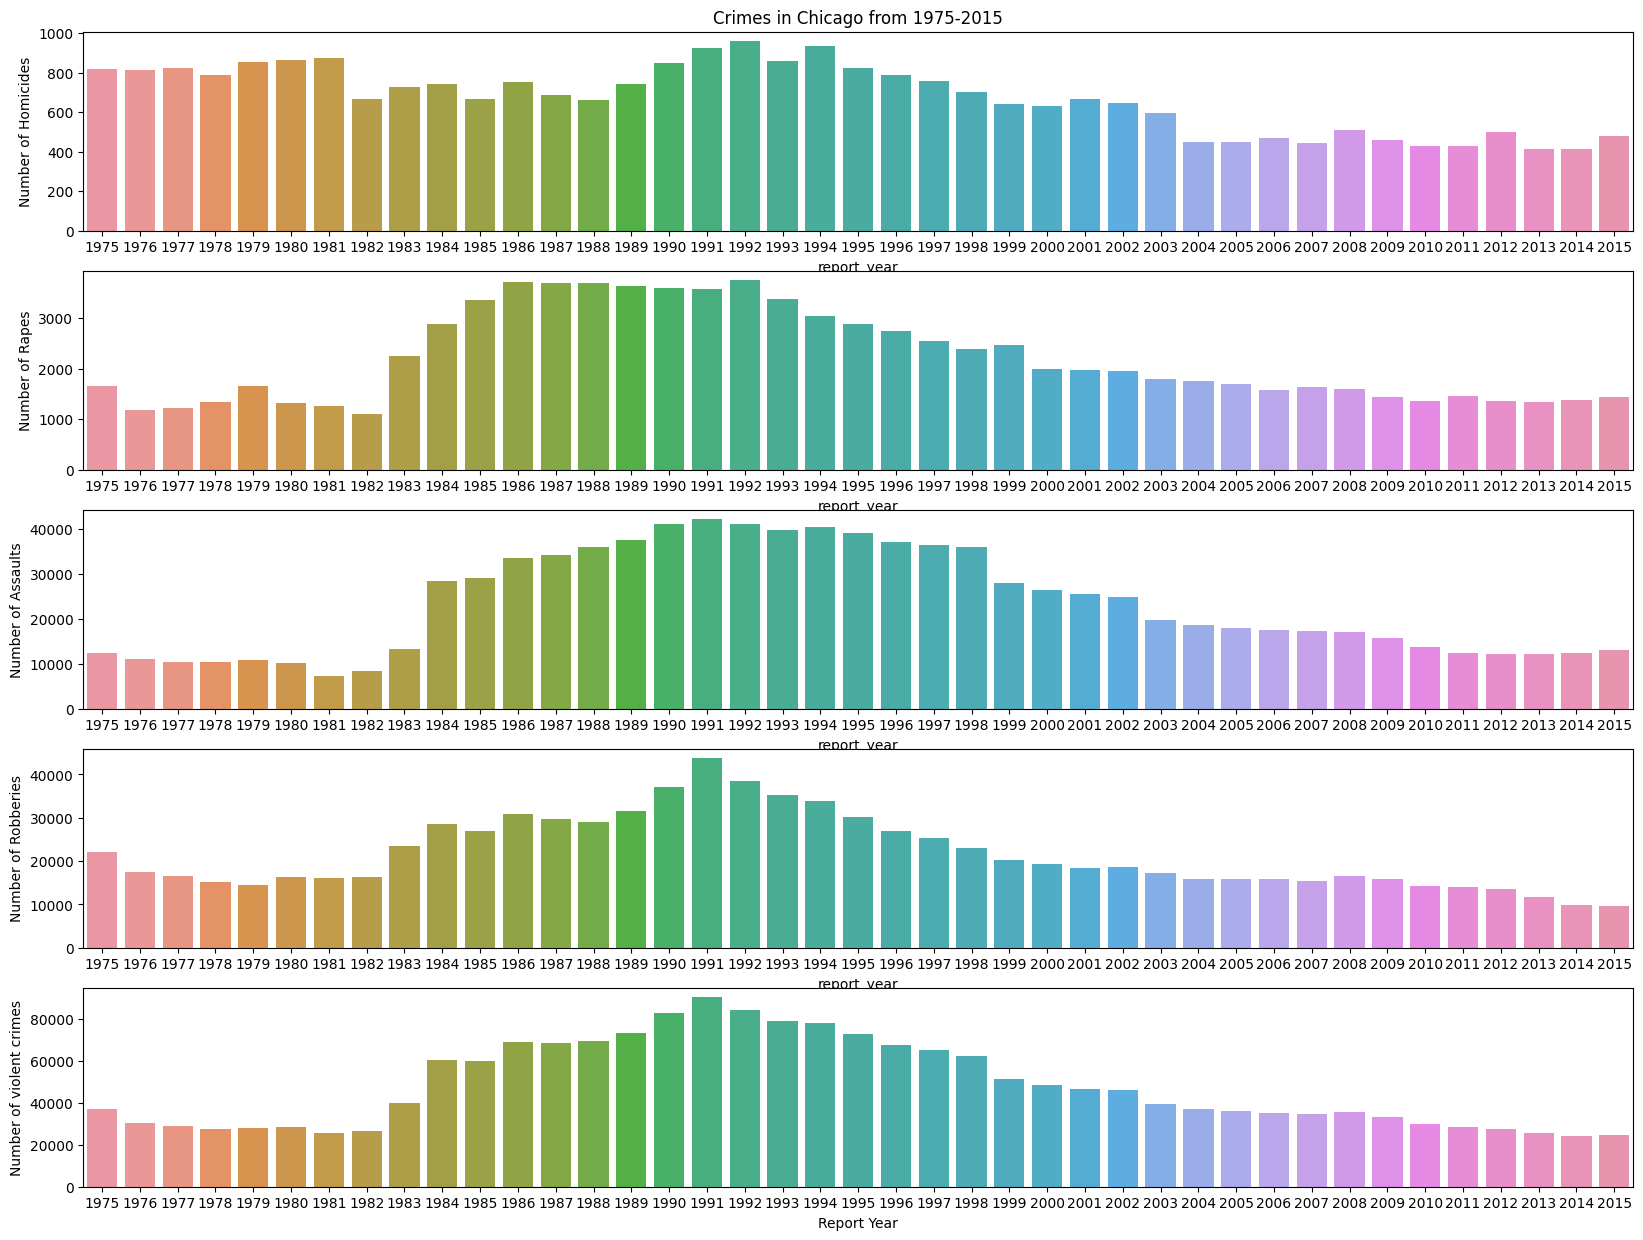

In [81]:
# Crimes in New York from 1975 to 2015
df_Chicago = df[df['agency_jurisdiction'] == 'Chicago, IL']

plt.figure(figsize=(20,15))
sns.set_palette("magma")

ax1 = plt.subplot(511)
sns.barplot(x = df_Chicago["report_year"], y = df_Chicago["homicides"])
plt.ylabel("Number of Homicides")

ax2 = plt.subplot(512, sharex=ax1)
sns.barplot(x=df_Chicago["report_year"], y=df_Chicago["rapes"])
plt.ylabel("Number of Rapes")

ax3 = plt.subplot(513, sharex=ax1)
sns.barplot(x=df_Chicago["report_year"], y=df_Chicago["assaults"])
plt.ylabel("Number of Assaults")

ax4 = plt.subplot(514, sharex=ax1)
sns.barplot(x=df_Chicago["report_year"], y=df_Chicago["robberies"])
plt.ylabel("Number of Robberies")

ax5 = plt.subplot(515, sharex=ax1)
sns.barplot(x=df_Chicago["report_year"], y=df_Chicago["violent_crimes"])
plt.ylabel("Number of violent crimes")

ax1.set_title('Crimes in Chicago from 1975-2015')
plt.xlabel("Report Year")
plt.show()

* Chicago has 2nd highest number of crimes so we focussed on crimes of different category for Chicago from 1975 to 2015.

* As can be seen from above the crime rates for homicides have been above 800 from 1975 to 1981 remaining above or at those levels and then peaking from 1990 to 1995  and then reducing gradually till 2005. From 2005 to 2015 it has remained consistent in between 500 to 600 levels

* Out of all the categories the rape crimes have been the 3rd  highest in Chicag. It started rising from 1983 peaking at 1986 and remaining consistent until 1993 and then gradually declining till 2005. After 2005 it has remained consistent till 2015.

* Assault crimes have been lowest out of al crimes just above homicides. From 1975 to 1982 it has been low and there was a sudden rise in 1983 peaking at 1986  and then being at same levels until 1993 and started declining from 1994
till 200. After 2000 it has been slightly dipping and rising to same levels until 2015.

* Robberies have been 2nd highest crime in Chicago. From 1975  to 1982 it has been more or less constant above 2000 crimes mark.It started rising from 1983 and peaked at 1991 and then has been constantly declining until 2000. From 2000 it has been consistent till 2009 and then has been declining until 2015 which is the lowest crime rate.


* Violent crimes have been the highest category crime for Chicago. From 1975 to 1982 the crimes have been slightly rising. Then rising again peaking from 1984 to 1991. The crime has been gradually decreasing from 1991 to 2003 and has been declining gradually from 2004 till 2015 with 2015 levels being lowest.

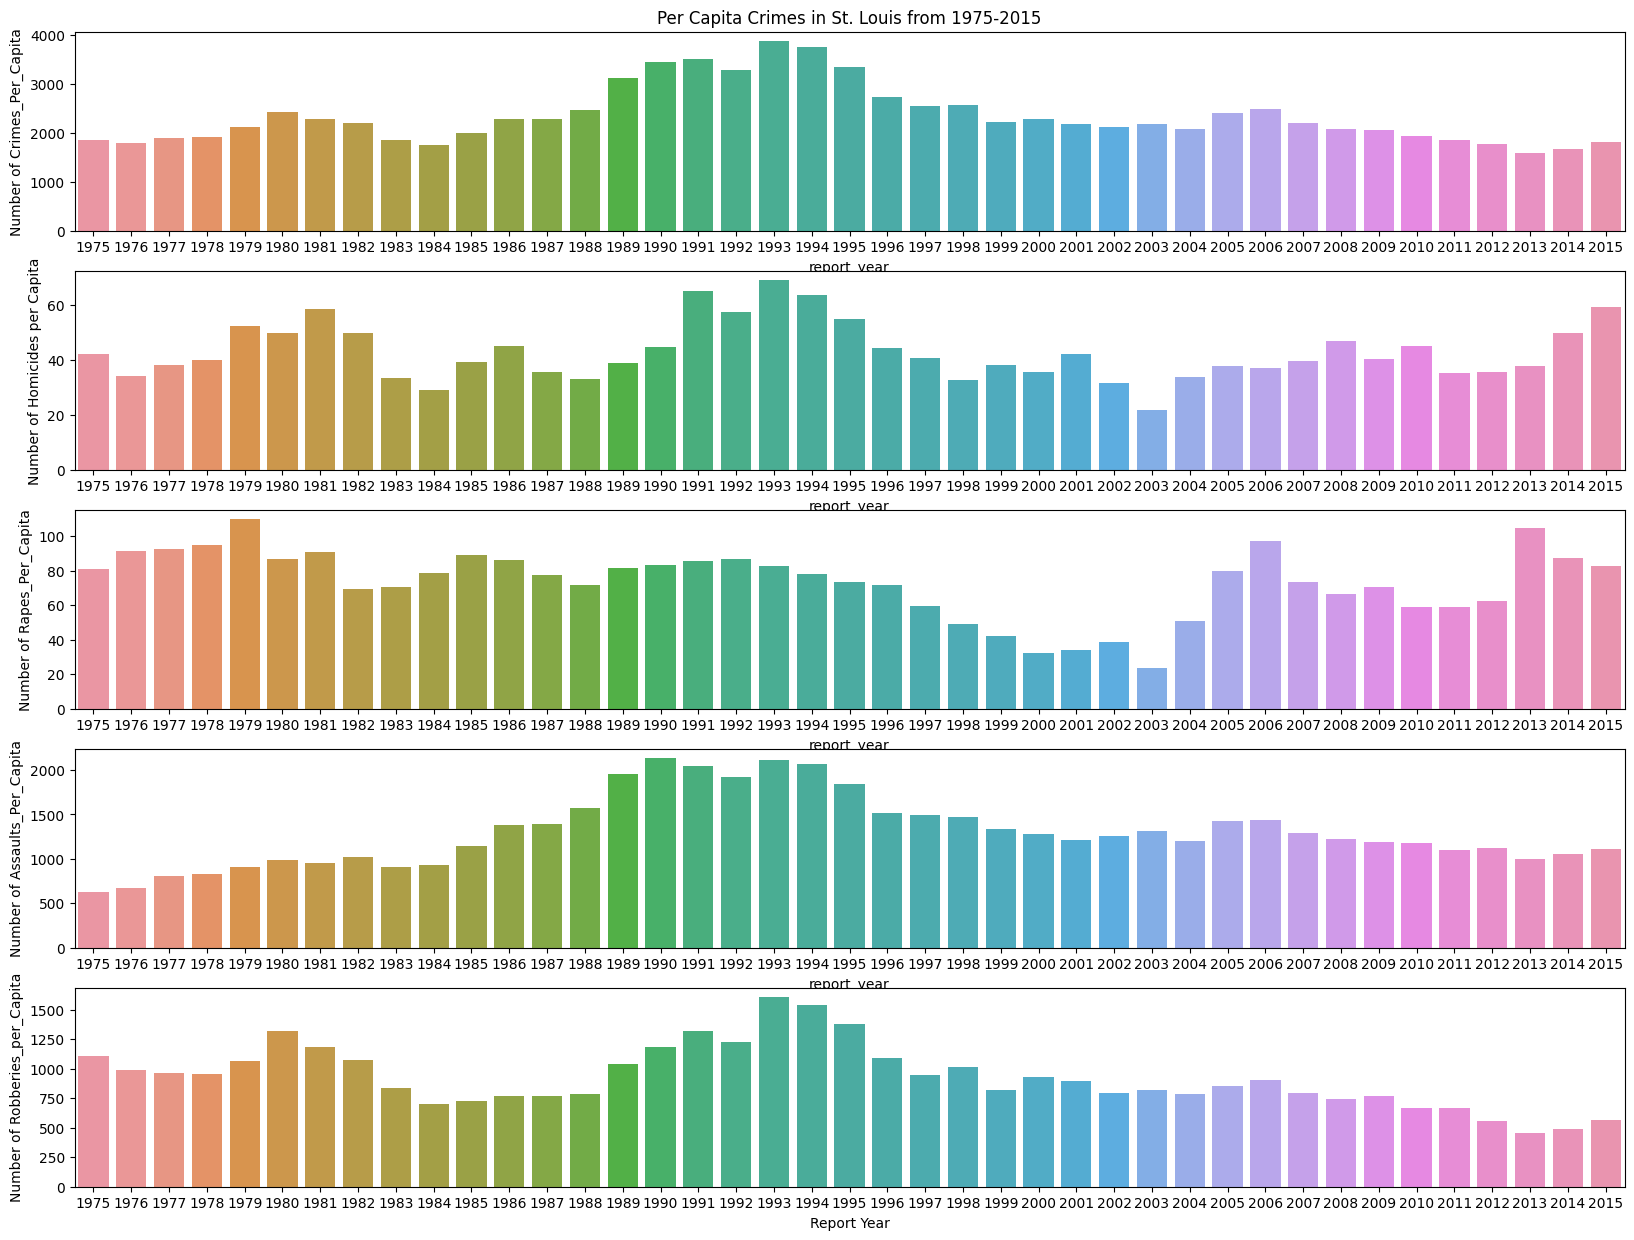

In [95]:
# Per Capita crimes in St. Louis from 1975 to 2015
df_St_Louis = df[df['agency_jurisdiction'] == 'St. Louis, MO']

plt.figure(figsize=(20,15))
sns.set_palette("magma")

ax1 = plt.subplot(511)
sns.barplot(x = df_St_Louis["report_year"], y = df_St_Louis["crimes_percapita"])
plt.ylabel("Number of Crimes_Per_Capita")

ax2 = plt.subplot(512, sharex=ax1)
sns.barplot(x=df_St_Louis["report_year"], y=df_St_Louis["homicides_percapita"])
plt.ylabel("Number of Homicides per Capita")

ax3 = plt.subplot(513, sharex=ax1)
sns.barplot(x=df_St_Louis["report_year"], y=df_St_Louis["rapes_percapita"])
plt.ylabel("Number of Rapes_Per_Capita")

ax4 = plt.subplot(514, sharex=ax1)
sns.barplot(x=df_St_Louis["report_year"], y=df_St_Louis["assaults_percapita"])
plt.ylabel("Number of Assaults_Per_Capita")

ax5 = plt.subplot(515, sharex=ax1)
sns.barplot(x=df_St_Louis["report_year"], y=df_St_Louis["robberies_percapita"])
plt.ylabel("Number of Robberies_per_Capita")

ax1.set_title('Per Capita Crimes in St. Louis from 1975-2015')
plt.xlabel("Report Year")
plt.show()

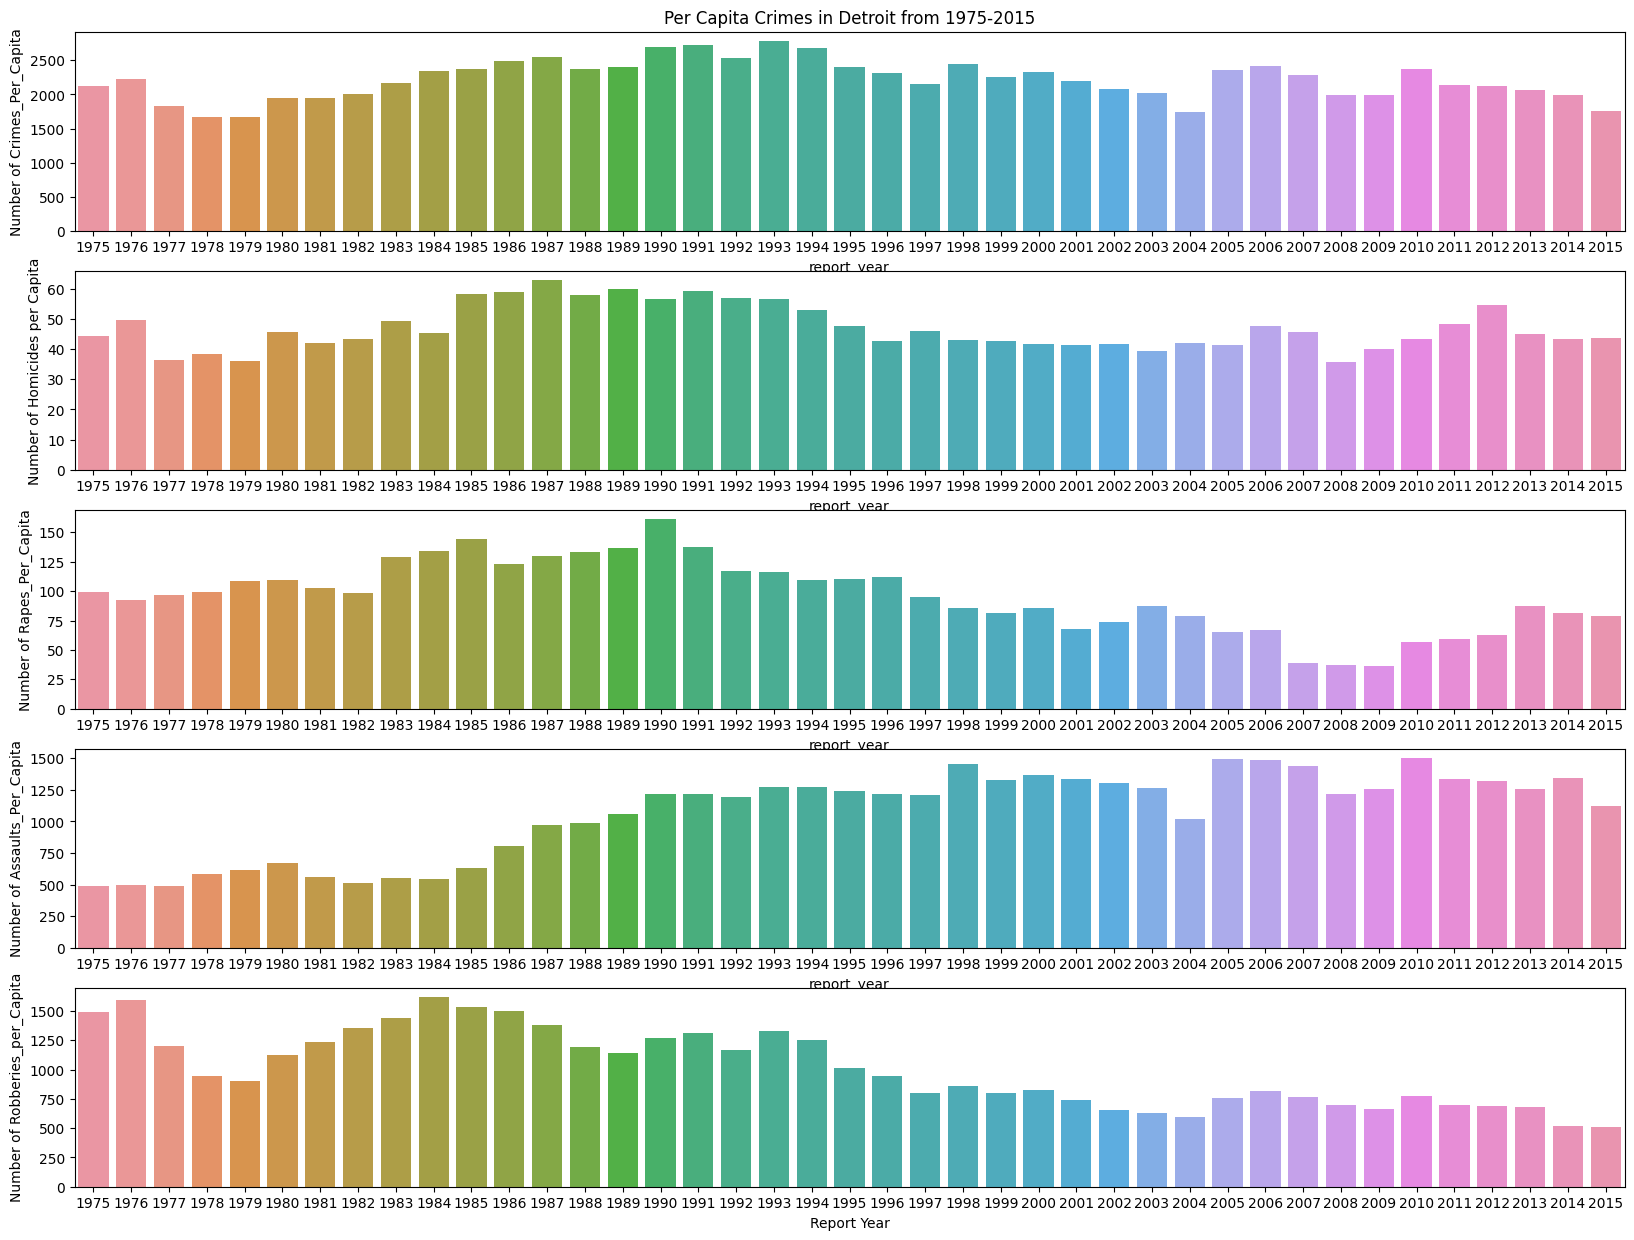

In [97]:
# Per Capita crimes in St. Louis from 1975 to 2015
df_Detroit = df[df['agency_jurisdiction'] == 'Detroit, MI']

plt.figure(figsize=(20,15))
sns.set_palette("magma")

ax1 = plt.subplot(511)
sns.barplot(x = df_Detroit["report_year"], y = df_Detroit["crimes_percapita"])
plt.ylabel("Number of Crimes_Per_Capita")

ax2 = plt.subplot(512, sharex=ax1)
sns.barplot(x=df_Detroit["report_year"], y=df_Detroit["homicides_percapita"])
plt.ylabel("Number of Homicides per Capita")

ax3 = plt.subplot(513, sharex=ax1)
sns.barplot(x=df_Detroit["report_year"], y=df_Detroit["rapes_percapita"])
plt.ylabel("Number of Rapes_Per_Capita")

ax4 = plt.subplot(514, sharex=ax1)
sns.barplot(x=df_Detroit["report_year"], y=df_Detroit["assaults_percapita"])
plt.ylabel("Number of Assaults_Per_Capita")

ax5 = plt.subplot(515, sharex=ax1)
sns.barplot(x=df_Detroit["report_year"], y=df_Detroit["robberies_percapita"])
plt.ylabel("Number of Robberies_per_Capita")

ax1.set_title('Per Capita Crimes in Detroit from 1975-2015')
plt.xlabel("Report Year")
plt.show()

* It was found that out of top 10 states for percapita crimes in 2015, St. Louis and Detroit were almost there in all crime categories.
* The graphs above describe distribution of Per capita crimes such as crimes_percapita, Homicides_percapita, assaults_percapita, rapes_percapita and robberies_percapita.

* Crimes_perCapita - If we look closely, we find that the crimes_percapita for both the states has reached the pre 1980 levels in terms of occurence of crimes due to either rise in crimes_percapita or unable to reduce them.

* Homicides_percapita - The Homicides_per capita crime for both the states has been on the rise. For Detroit it has touched the 1977 high levels and for St. Louis it is slightly below the peak levels matching the year 1993 levels.

* Rapes_percapita - The crime is on the rise and has crossed the level of 80 for St. Louis which is 1993 levels when crimes were on peak and for Detroit it has touched the 2013 which is highest after the year 2000.

* Assaults_perCapita - The Assaults_per capita for St. Louis has remained consistent from 1999 with a slight decrese or rise in crime levels near 1000. For Detroit assault crime levels have rise above 1000 from 1989 and has more or less remained near 1000 with no curb in this crime from 1989 to 2015.

* Robberies_perCapita - The Robberies_per_capita has reamined consistent from 2003 levels for both the states around 500.


## **7) Summary**

* The maximum number of crimes in terms of percentage of population occured in St. Lois, MO which is about 3.63% that is highest amongst all the states followed by Detroit, MI with 3.52% in 2nd and Memphis, TN with 3.48% as third amongst the category.

* It can also be observed that New York City ranks highest in total crimes which is around 1lac with second highest being in Los Angeles, CA which has around 50k crimes recorded for year 2015.

* It can also be seen that the crimes in New York City, NY are double that of second highest crime state Los Angeles, CA which is a huge gap.

* The difference in total crimes amongst 3rd, 4th , 5th highest states is not more than 10k. Thus we need to further investigate why the crime rate in New York City is double that of Los Angeles which is 2nd highest in crime.

* Violent crimes- The crimes which are grave and heinious in nature. The top three state in this category are New York with 42,63,284 followed by Los Angeles 19,79,166 and Chicago which has 19,60,866 instances till date.

* Homicides - These crimes show the crimes which include violence by firearams.The top three states in this category being New York with 47,716 instances followed by Los Angeles with 27,727 instances and Chicago with 25,999 instances.

* Rapes - These are crimes against women and top three states being NewYork, Los Angeles and chicago. It is observed that the crimes of rapes are higher than homicides in these top 3 states

* Assaults - These are attacks of physical nature with the intent to kill or harm a person. The top three states being the same in all categories. The crimes in assaults category are higher than homicides and rapes in these states.

* Robberies - It is action of taking of property from a person by force or threat of force. The top 3 states are the New York, Los Angeles and Chicago. It is also oberved that Robberies rank 3nd in crime category greater than homicides and rapes but less than assaults as well as violent _crimes.

* Crimes_percapita - It was observed that the top 3 states in crimes per capita for year 2015 are St. Louis(MO) with 1817 crimes per thousand followed by Detroit(MI) 1759crimes and Memphis(TN) 1740 crimes. The difference between top 3 states is not much and all of them can be considered highest in crimes_percapita

* Homicides_percapita - For the year 2015, top 3 states in homicides per capita are St. Louis(MO) with 59.29 crimes, Baltimore(MD) with 55.37 crimes and Detroit, MI with 43.82 crimes.

* Rapes_percapita - The results were from rape crimes per thousand for the year 2015. Salt Lake City, UT with 151.57 crimes per thousand followed by New Orleans,LA with 103.95 and Minneapolis, MN at 98.43 crimes are top 3 states. The difference between Salt Lake City, UT and New Orleans is around 30% which is very high compared to other states in the sequence.

* Assaults_percapita - The results indicated that top 3 states in assault crimes per thousand were Memphis, TN is leading at 116.3 crimes per thousand followed by Detroit,MI at 1123.55 crimes and St. Louis, MO at 1110.39 crimes oer thousand.

* Robberies_percapita - The results indicated that top 3 states in robbery crimes per thousand were Oakland, CA is at top with 784.30 crimes per thousand followed by Baltimore, MD at 694.24 crimes per thousand and Neward, NJ with 642.40 crimes at 3rd position.

**Historical Crime Trends**
* Violent_crimes - The violent crimes are the crimes which are violent and heinious in nature. The violent crimes had been rising from 1975 to 1992 with the highest rate of violent crime in the year 1992.

* Homicides - Homicides mean killing of one person by another. It was also observed that homicide crime rates were rising at a greater rate than violent crimes with highest being in the year 1992.

* Rapes - These crimes have always been highest from year 1985 to 1992 peaking during these years and more or less remaining at same levels. It was also obersved that unlike other crimes which have been gradually rising, rapes have always been high and remained same during 1985 to 1992 and then showing a gradual reduction from 1992 to 2015 but still higher compared to other crimes.

* Assaults - These are the crimes committed with intent to kill or harm a person. The Assault crimes had been highest from 1989 till 1994 and then gradually decreasing but still higher than pre 1989 levels.

* Robberies - It is action of taking of property from a person by force or threat of force. The robberies have been higher compared to other crimes between 4000 - 6000 with crimes peaking in the year 1991 and then gradually decreasing.

**New York City Crime Trends:**

* Homicide rates were consistently high  above 1500 from 1975 to 1989 and then peaking from 1990 till 1993 and gradually declining and reamined lowest in 2015.

* Rape crimes is the 3rd highest crime category for New York. It peaked in 1985, decreased until 1993, and then increased after 2013 till 2015 acheiving 1998 levels.

* Assault crimes were relatively steady from 1975 to 1991, decreased, and then slightly rose after 2010 till 2015 reaching 2005 crime levels.

* Robberies in New York City peaked in 1991 and decreased from 1994, remaining consistently low.

* Violent crimes followed a similar pattern to assaults, with a slight dip in 2015.

**Chicago Crime Trends:**

* Homicides: High rates until 1981, peaked from 1990 to 1995, then gradually declined until 2005 and remained stable from 2005 to 2015.

* Rape Crimes: Rose from 1983, peaked in 1986, stayed consistent until 1993, and gradually declined until 2005. Rates remained steady from 2005 to 2015.

* Assault Crimes: Experienced a sudden rise in 1983, peaking in 1986, remaining elevated until 1993. Gradual decline from 1994 to 2000, with some fluctuations thereafter.

* Robberies: Consistent from 1975 to 1982, increased from 1983, peaked in 1991, and steadily declined until 2000. Rates remained stable from 2000 to 2009 and then decreased to their lowest levels in 2015.

* Violent Crimes: Gradual increases from 1975 to 1982, significant rise from 1984 to 1991, gradual decline from 1991 to 2003, and continuous decrease from 2004 to 2015, reaching their lowest levels in 2015.

* Overall Trend: Chicago witnessed fluctuations and peaks in different crime categories, with notable reductions in crime rates, particularly in violent crimes, robberies, and homicides in the 2000s.


 **St. Louis and Detroit crimes per capita trend**

* Crimes_perCapita - If we look closely, we find that the crimes_percapita for both the states has reached the pre 1980 levels in terms of occurence of crimes due to either rise in crimes_percapita or unable to reduce them.

* Homicides_percapita - The Homicides_per capita crime for both the states has been on the rise. For Detroit it has touched the 1977 high levels and for St. Louis it is slightly below the peak levels matching the year 1993 levels.

* Rapes_percapita - The crime is on the rise and has crossed the level of 80 for St. Louis which is 1993 levels when crimes were on peak and for Detroit it has touched the 2013 which is highest after the year 2000.

* Assaults_perCapita - The Assaults_per capita for St. Louis has remained consistent from 1999 with a slight decrese or rise in crime levels near 1000. For Detroit assault crime levels have rise above 1000 from 1989 and has more or less remained near 1000 with no curb in this crime from 1989 to 2015.

* Robberies_perCapita - The Robberies_per_capita has reamined consistent from 2003 levels for both the states around 500.







## **8) Recommendations**

After careful data anlysis of the dataset it was found that the top cities and states which should be primary focus for law enforcement agencies are

1. New York, NJ
2. Chicago, IL
3. St. Luois, MO
4. Detroit , MI
5. Los Angeles, CA

The cities such as New York,NJ and  Los Angeles,CA were at the top of crime chart in all categories in the 40 year history.

The states such as Chicago, St. Louis and Detroit topped in crime charts per capita as per our analysis.

**Data analysis** - Recording the time, place and neigbourhood if the crime inorder to conclude where exactly is the crime happening and increase police patrolling in those areas.

**Community reachout** - Community relation buidling by creating awareness programmes, sessions,  talking to people inorder to know and curb the reason for rising crimes.

**Gun control Measures** - The rising crime rate might be due to gun violence and gand wars and gun control measure when put in place can help reduce the crime.

**Resources** - Using the right amount of man power and alloting more police personnel to the places of high crimes. Equipping officers with right kind of equipment, facilitating regular trainings for officers.

**Curbing Corruption** - Curbing corruption amongst the law enforcement agencies is vitaly important. This can only be done by giving them confidence and compensating well interms of monetary benefits and compensating them well with other  benefits such as health insurance, retirement fund, etc. Also to keep a vigil on force personnels to check whether there is rampant corruption in the force and to address it immediately.

**Drug reduction** - Drugs is a mjor source of crime amongst youths. Educating youths about the menace of drugs, guiding them and motivating them to make right choices in terms of career and other services will help. Also creating a larger network of informers inorder to minimize the sale and usage of drugs on the streets.

All these recommendations can be put to use by putting a proper policy document creating a process to be followed by the law enforcement agencies. These recommendations have some limitations as the dataset did not have comprehensive knowledge about the following:

**Limitations**
* No knowledge about the number of police personnel per state or city.
* Patrolling movements and male, female ratio in the forces.
* The current policies being followed to curb the crime menace
* The dataset might have limitations in terms of how the crimes are recorded and put in which category.

All the recommendations when implemented on the above 5 states will give us a better understanding about the policies to be followed.
